## Clustering AM

### Import Data

In [2]:
import pandas as pd 

final_df = pd.read_csv('players_rating_potential_database.csv')

In [3]:
final_df_am = final_df[final_df["Position"] == "Att Mid / Wingers"].copy()

In [4]:
final_df_am

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential
449,Matteo Politano,1993-08-03,SerieA,Napoli,Left,Italy,Att Mid / Wingers,2804,0.10,0.13,...,0.0,0.0,3.05,0.19,0.64,23.1,1838,32.0,78.032681,78.032681
450,Khvicha Kvaratskhelia,2001-02-12,SerieA,Paris Saint-Germain,Right,Georgia,Att Mid / Wingers,1178,0.38,0.23,...,0.0,0.0,3.44,0.31,0.38,44.4,1975,24.0,80.539430,83.889082
451,David Neres,1997-03-03,SerieA,Napoli,Left,Brazil,Att Mid / Wingers,1283,0.14,0.28,...,0.0,0.0,3.65,0.21,0.70,23.1,1838,28.0,76.513364,76.513364
452,Giacomo Raspadori,2000-02-18,SerieA,Napoli,Right,Italy,Att Mid / Wingers,1103,0.49,0.08,...,0.0,0.0,3.51,0.41,0.90,31.3,1838,25.0,78.753267,79.401676
453,Michael Folorunsho,1998-02-07,SerieA,Fiorentina,Right,Italy,Att Mid / Wingers,685,0.00,0.00,...,0.0,0.0,4.07,2.37,1.71,58.1,1757,27.0,67.822715,67.822715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Wes Burns,1994-11-23,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,926,0.00,0.10,...,0.0,0.0,4.86,0.78,2.04,27.6,1797,31.0,71.552210,71.552210
1022,Conor Chaplin,1997-02-16,PremierLeague,Ipswich Town,Right,England,Att Mid / Wingers,857,0.11,0.11,...,0.0,0.0,2.84,0.32,0.95,25.0,1797,28.0,72.447367,72.447367
1023,Nathan Broadhead,1998-04-05,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,702,0.26,0.00,...,0.0,0.0,4.10,0.13,1.28,9.1,1797,27.0,68.134265,68.134265
1024,Mateus Fernandes,2004-07-10,PremierLeague,Southampton,Right,Portugal,Att Mid / Wingers,2909,0.06,0.12,...,0.0,0.0,5.54,0.46,0.28,62.5,1782,21.0,76.610350,82.266718


In [5]:
# 2. Define target and input features //
meta_cols = ['Player', 'Position', 'Club', 'Birthdate'] 

attacking_mids_wingers_features = [
    'Goals', 'Assists', 'npxG + xAG',                 # Direct goal involvement and advanced expected contribution
    'Shots on Target', 'Goals/Shot',                  # Shooting efficiency and accuracy
    'Average Shot Distance',                          # Indicates shot selection and tactical role
    'Progressive Carries', 'Progressive Carrying Distance', # Ball progression via dribbling
    'Carries into Final Third', 'Carries into Penalty Area', # Advanced movement into dangerous zones
    'Successful Take-Ons', 'Successful Take-On %',    # 1v1 dribbling ability
    'Touches (Att 3rd)', 'Touches (Att Pen)',         # Presence in attacking areas
    'Pass Completion %', 'Live-ball Passes',          # Ball retention and passing in play
    'Progressive Passes', 'Progressive Passing Distance', # Forward passing impact
    'Passes into Final Third', 'Passes into Penalty Area', # Penetrative passing
    'Crosses', 'Crosses into Penalty Area',           # Creating chances from wide areas
    'Through Balls', 'Switches',                      # Creativity and vision
    'SCA (Live-ball Pass)', 'SCA (Take-On)', 'SCA (Shot)', # Shot-creating actions via various means
    'GCA (Live-ball Pass)', 'GCA (Take-On)', 'GCA (Shot)', # Goal-creating actions
    'Miscontrols', 'Dispossessed',                    # Ball security under pressure
    'Fouls Drawn'                                     # Ability to win set pieces
]

In [6]:
df_meta = final_df_am[meta_cols]

X = final_df_am[attacking_mids_wingers_features]

X

,Goals,Assists,npxG + xAG,Shots on Target,Goals/Shot,Average Shot Distance,Progressive Carries,Progressive Carrying Distance,Carries into Final Third,Carries into Penalty Area,...,Switches,SCA (Live-ball Pass),SCA (Take-On),SCA (Shot),GCA (Live-ball Pass),GCA (Take-On),GCA (Shot),Miscontrols,Dispossessed,Fouls Drawn
449,0.10,0.13,0.25,0.45,0.05,19.5,4.33,104.76,1.83,1.22,...,0.32,2.34,0.16,0.13,0.26,0.00,0.00,1.51,0.77,1.00
450,0.38,0.23,0.53,1.22,0.08,19.4,5.65,146.08,3.90,2.83,...,0.38,3.06,0.15,0.15,0.38,0.08,0.00,1.91,1.60,2.52
451,0.14,0.28,0.43,0.49,0.07,18.1,5.12,133.49,2.60,2.10,...,0.00,2.74,0.70,0.14,0.35,0.14,0.00,2.67,1.61,0.70
452,0.49,0.08,0.52,1.14,0.14,16.0,1.47,40.96,0.49,0.41,...,0.16,2.37,0.16,0.49,0.16,0.00,0.00,2.04,0.73,1.63
453,0.00,0.00,0.24,0.39,0.00,13.6,1.71,57.68,0.66,0.66,...,0.00,1.18,0.26,0.13,0.13,0.00,0.00,1.84,1.18,3.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0.00,0.10,0.21,0.10,0.00,18.3,3.69,67.65,1.26,0.97,...,0.10,1.17,0.10,0.10,0.10,0.00,0.00,1.65,1.26,1.07
1022,0.11,0.11,0.23,0.32,0.06,17.7,1.37,49.04,0.95,0.00,...,0.11,2.00,0.00,0.00,0.11,0.00,0.00,1.26,0.53,0.74
1023,0.26,0.00,0.31,1.03,0.15,15.8,2.56,74.87,2.05,0.64,...,0.13,1.92,0.77,0.13,0.13,0.13,0.00,2.44,1.92,1.67
1024,0.06,0.12,0.22,0.43,0.05,18.7,2.35,97.24,2.17,0.28,...,0.31,1.36,0.19,0.19,0.12,0.00,0.00,1.79,1.11,1.70


### PCA

In [7]:
# Now ready for scaling and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components explaining 95% variance: {X_pca.shape[1]}")

Number of components explaining 95% variance: 20


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_metrics(X, k_range):
    inertias = []
    silhouettes = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # Plot Inertia (WCSS)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.title('Within-Cluster Sum of Squares')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)

    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouettes

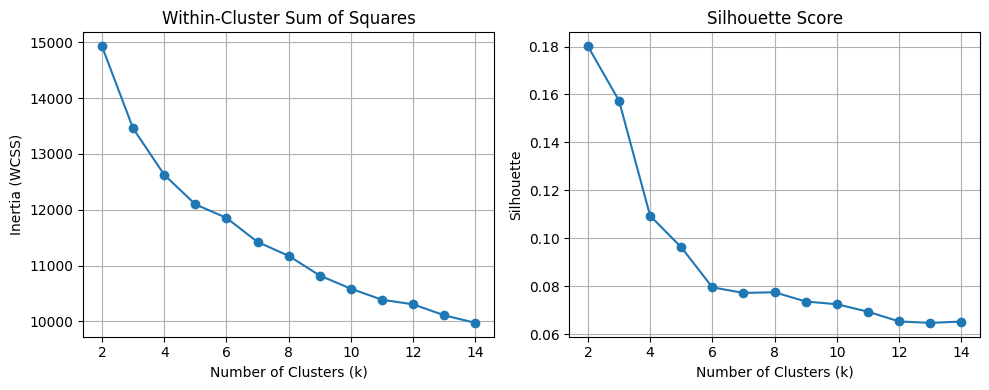

In [9]:
k_range = range(2, 15)
inertias, silhouettes = plot_kmeans_metrics(X_pca, k_range)

In [10]:
final_kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)

X = X.copy()  # Make an explicit copy if X came from slicing
X['cluster'] = cluster_labels

### TSNE & UMAP

In [11]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(X, cluster_labels, df_meta, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=["UMAP-1", "UMAP-2"])
    df_umap['Cluster'] = cluster_labels
    df_umap['Player'] = df_meta['Player'].values
    df_umap['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_umap, x='UMAP-1', y='UMAP-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('UMAP Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_umap


/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


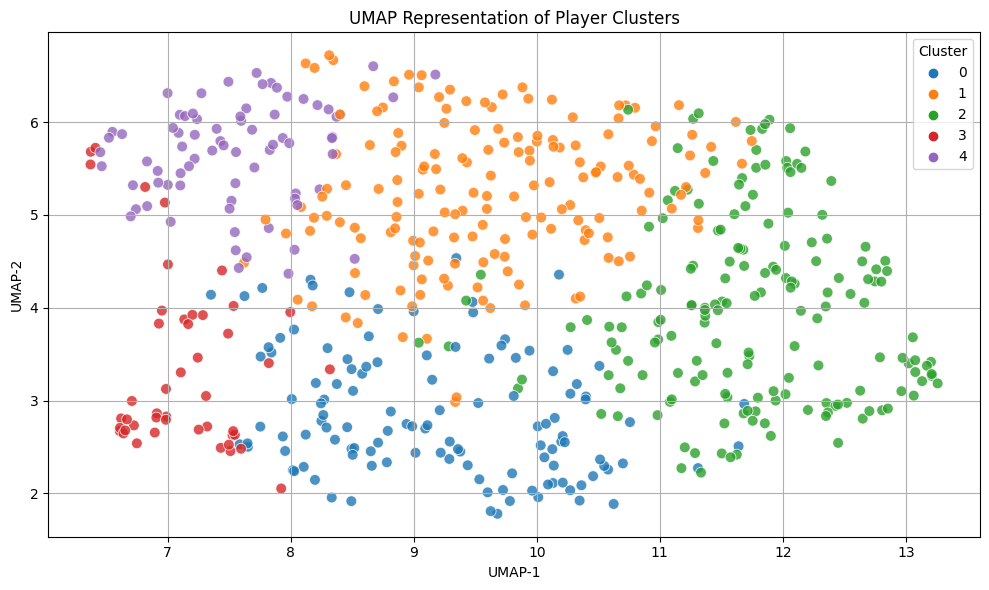

In [12]:
df_umap = plot_umap(X_pca, cluster_labels, df_meta)

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=200, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate,
                n_iter=n_iter, init='pca', random_state=42)
    X_tsne = tsne.fit_transform(X_pca)

    df_tsne = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
    df_tsne['Cluster'] = cluster_labels
    df_tsne['Player'] = df_meta['Player'].values
    df_tsne['Position'] = df_meta['Position'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=60, alpha=0.8)
    plt.title('t-SNE (Tuned) Representation of Player Clusters')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_tsne

/Users/ghalichraibi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


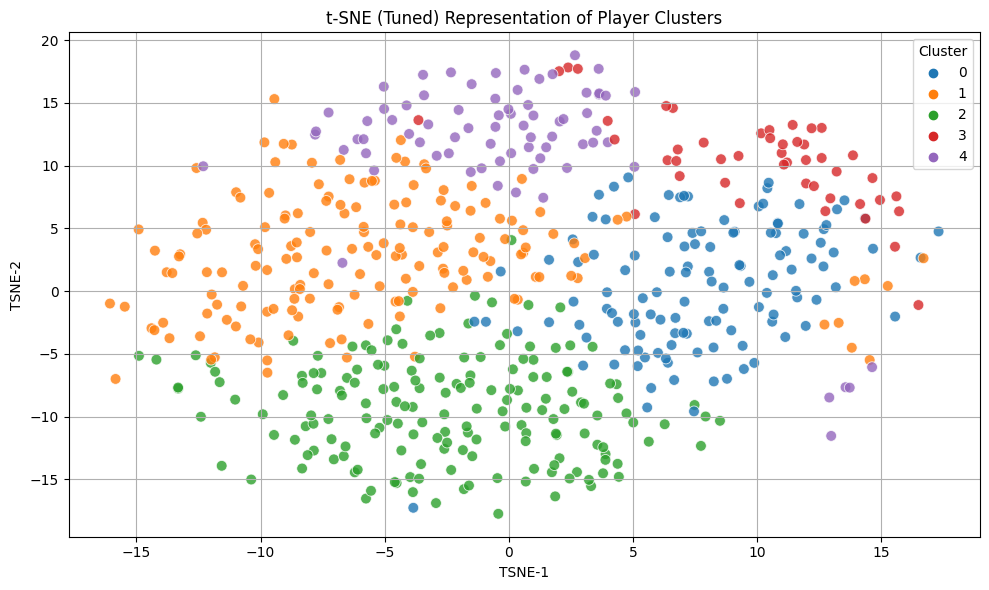

In [14]:
df_tsne = plot_tsne_tuned(X_pca, cluster_labels, df_meta, perplexity=40, learning_rate=300)

### Playstyle defintion

In [15]:
final_df_am["Cluster"] = cluster_labels

final_df_am

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
449,Matteo Politano,1993-08-03,SerieA,Napoli,Left,Italy,Att Mid / Wingers,2804,0.10,0.13,...,0.0,3.05,0.19,0.64,23.1,1838,32.0,78.032681,78.032681,0
450,Khvicha Kvaratskhelia,2001-02-12,SerieA,Paris Saint-Germain,Right,Georgia,Att Mid / Wingers,1178,0.38,0.23,...,0.0,3.44,0.31,0.38,44.4,1975,24.0,80.539430,83.889082,4
451,David Neres,1997-03-03,SerieA,Napoli,Left,Brazil,Att Mid / Wingers,1283,0.14,0.28,...,0.0,3.65,0.21,0.70,23.1,1838,28.0,76.513364,76.513364,4
452,Giacomo Raspadori,2000-02-18,SerieA,Napoli,Right,Italy,Att Mid / Wingers,1103,0.49,0.08,...,0.0,3.51,0.41,0.90,31.3,1838,25.0,78.753267,79.401676,2
453,Michael Folorunsho,1998-02-07,SerieA,Fiorentina,Right,Italy,Att Mid / Wingers,685,0.00,0.00,...,0.0,4.07,2.37,1.71,58.1,1757,27.0,67.822715,67.822715,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Wes Burns,1994-11-23,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,926,0.00,0.10,...,0.0,4.86,0.78,2.04,27.6,1797,31.0,71.552210,71.552210,2
1022,Conor Chaplin,1997-02-16,PremierLeague,Ipswich Town,Right,England,Att Mid / Wingers,857,0.11,0.11,...,0.0,2.84,0.32,0.95,25.0,1797,28.0,72.447367,72.447367,2
1023,Nathan Broadhead,1998-04-05,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,702,0.26,0.00,...,0.0,4.10,0.13,1.28,9.1,1797,27.0,68.134265,68.134265,1
1024,Mateus Fernandes,2004-07-10,PremierLeague,Southampton,Right,Portugal,Att Mid / Wingers,2909,0.06,0.12,...,0.0,5.54,0.46,0.28,62.5,1782,21.0,76.610350,82.266718,0


In [16]:
cluster_summary = X.copy()
summary_stats = cluster_summary.groupby('cluster').agg(['mean'])

In [17]:
mean_per_cluster = summary_stats.xs('mean', axis=1, level=1)
std_across_clusters = mean_per_cluster.std(axis=0)

summary_stats

,Goals,Assists,npxG + xAG,Shots on Target,Goals/Shot,Average Shot Distance,Progressive Carries,Progressive Carrying Distance,Carries into Final Third,Carries into Penalty Area,...,Switches,SCA (Live-ball Pass),SCA (Take-On),SCA (Shot),GCA (Live-ball Pass),GCA (Take-On),GCA (Shot),Miscontrols,Dispossessed,Fouls Drawn
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.189339,0.187273,0.356281,0.620744,0.096860,19.603306,2.286860,78.371983,1.727851,0.600331,...,0.353967,2.572066,0.157603,0.215289,0.271570,0.014050,0.027107,1.855207,1.240165,1.330909
1,0.231524,0.139146,0.365366,0.815915,0.095244,18.224390,3.670000,99.172256,2.149939,1.457683,...,0.184207,2.180671,0.360061,0.264573,0.222195,0.039512,0.039512,2.654268,1.689512,1.761707
2,0.178129,0.111520,0.313509,0.612281,0.097368,16.985380,1.942222,56.381637,1.229181,0.651404,...,0.142281,1.778421,0.138187,0.203918,0.173801,0.017485,0.024620,2.180000,1.257602,1.448538
3,0.301304,0.272174,0.496739,0.820000,0.111522,20.058696,3.099348,114.407609,2.577391,0.841304,...,0.552391,3.545870,0.281957,0.228043,0.418913,0.031739,0.036304,2.068913,1.511957,1.705000
4,0.356933,0.262267,0.556933,1.026667,0.124800,17.012000,5.079600,135.298133,2.784267,2.422000,...,0.206267,3.110400,0.530933,0.283467,0.402667,0.087200,0.040133,2.355733,1.545867,1.546533


In [18]:
summary_stats.to_excel(('cluster_summary_am_vf.xlsx'), index=True)

Top players per Cluster

In [19]:
def top_players_per_cluster(df, rating_col='Rating', cluster_col='Cluster', top_n=10):
    top_players = (
        df.sort_values(by=[cluster_col, rating_col], ascending=[True, False])
          .groupby(cluster_col)
          .head(top_n)
          .reset_index(drop=True)
    )
    return top_players[['Player', 'Position', 'Club', cluster_col, rating_col]]


In [20]:
top_10_per_cluster = top_players_per_cluster(final_df_am, rating_col='Rating', cluster_col='Cluster', top_n=10)
print(top_10_per_cluster)

                    Player           Position                 Club  Cluster  \
0               Phil Foden  Att Mid / Wingers      Manchester City        0   
1       Dominik Szoboszlai  Att Mid / Wingers            Liverpool        0   
2       Morgan Gibbs-White  Att Mid / Wingers    Nottingham Forest        0   
3            Thomas Müller  Att Mid / Wingers        Bayern Munich        0   
4            Julian Brandt  Att Mid / Wingers             Dortmund        0   
5             Jacob Murphy  Att Mid / Wingers     Newcastle United        0   
6            Adrien Rabiot  Att Mid / Wingers            Marseille        0   
7            Raphael Veiga  Att Mid / Wingers            Palmeiras        0   
8          Mattia Zaccagni  Att Mid / Wingers                Lazio        0   
9   Hákon Arnar Haraldsson  Att Mid / Wingers                Lille        0   
10        Leandro Trossard  Att Mid / Wingers              Arsenal        1   
11              Cody Gakpo  Att Mid / Wingers       

### Spider Charts

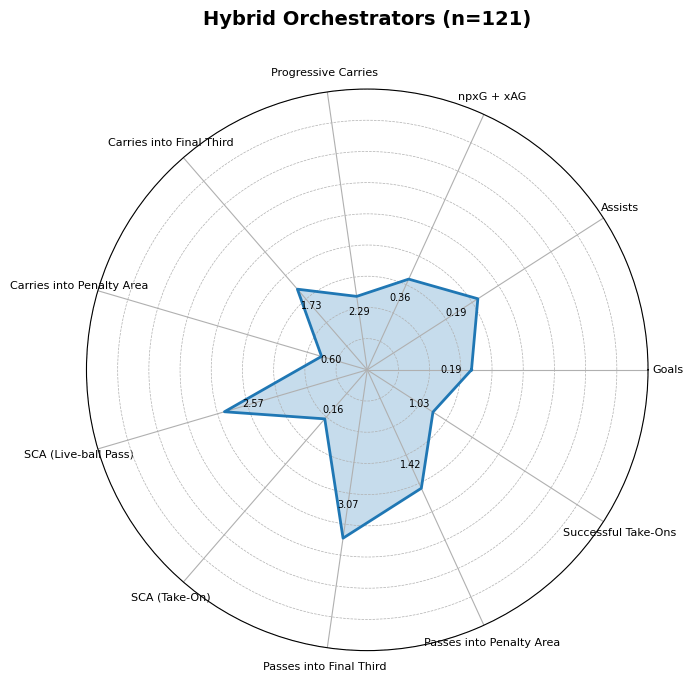

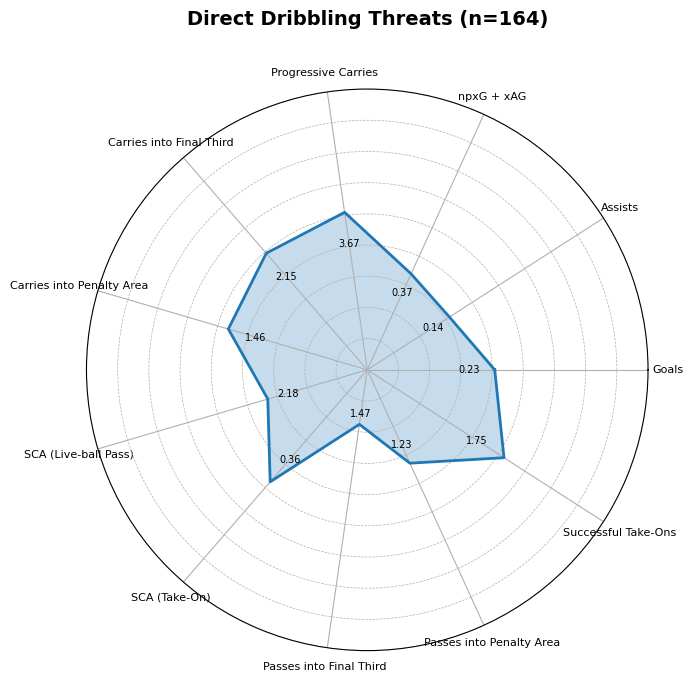

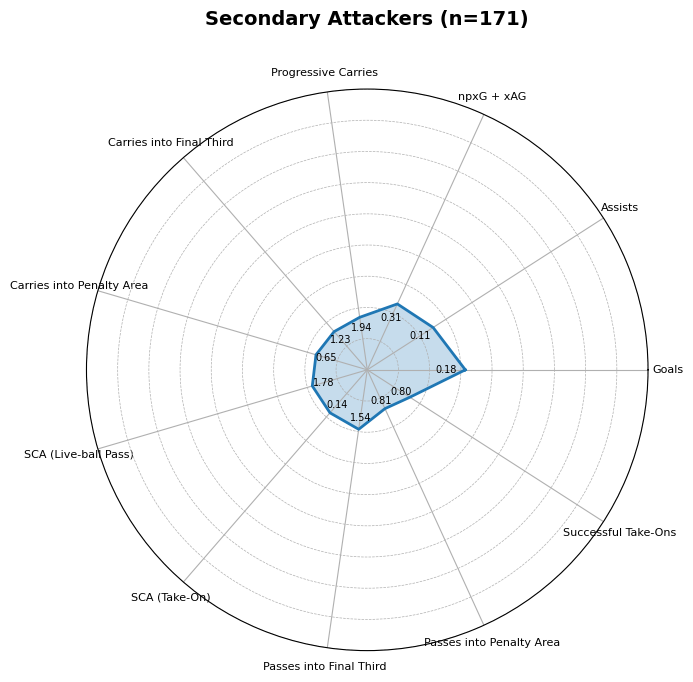

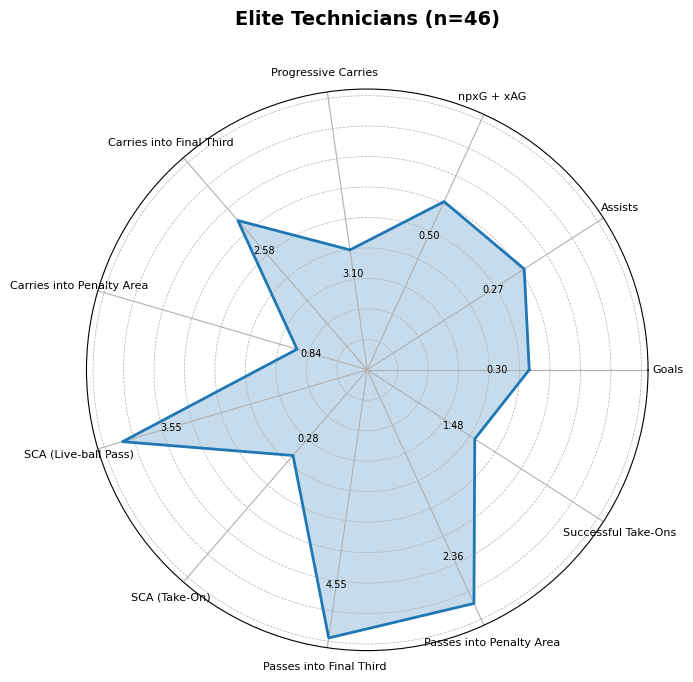

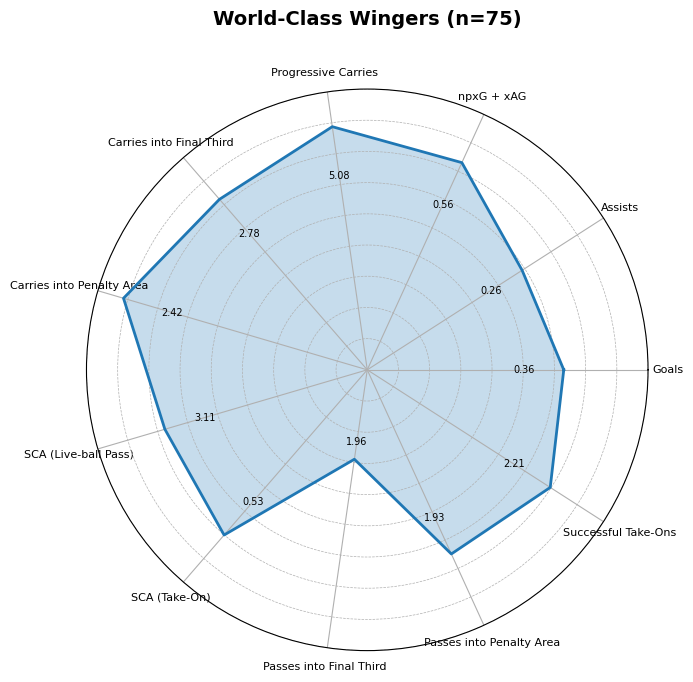

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === STEP 0 — Inputs ===
features = [
    "Goals", "Assists", "npxG + xAG", "Progressive Carries",
    "Carries into Final Third", "Carries into Penalty Area",
    "SCA (Live-ball Pass)", "SCA (Take-On)", 'Passes into Final Third', 'Passes into Penalty Area', 'Successful Take-Ons'
]

cluster_names = {
    0: ("Hybrid Orchestrators", 121),
    1: ("Direct Dribbling Threats", 164),
    2: ("Secondary Attackers", 171),
    3: ("Elite Technicians", 46),
    4: ("World-Class Wingers", 75)
}

# === STEP 1 — Compute raw cluster means ===
raw_means = final_df_am.groupby("Cluster")[features].mean()

# === STEP 2 — Compute 5th and 95th percentiles for full AM/W pool ===
lower_bounds = final_df_am[features].quantile(0.05)
upper_bounds = final_df_am[features].quantile(0.95)

# === STEP 3 — Normalize raw cluster means to build scaled radar profiles ===
range_vals = (upper_bounds - lower_bounds).replace(0, 1)
scaled_means = (raw_means - lower_bounds) / range_vals
scaled_means = scaled_means.clip(0, 1)

# === STEP 4 — Radar Chart Function ===
def create_annotated_radar(scaled_row, raw_row, cluster_id, title, n_lines=10):
    labels = scaled_row.index
    stats = scaled_row.values
    raw_stats = raw_row.values

    # Close the loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    raw_stats = np.concatenate((raw_stats, [raw_stats[0]]))
    angles += [angles[0]]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    # Radar plot
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)

    # Inner gridlines (no % labels)
    ax.set_yticks(np.linspace(0, 1, n_lines))
    ax.set_yticklabels([])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)

    # Annotate raw values near inner vertices (85% of scaled radius)
    for angle, scaled_val, raw_val in zip(angles[:-1], stats[:-1], raw_stats[:-1]):
        radius = scaled_val * 0.8
        ax.text(
            angle, radius, f"{raw_val:.2f}",
            ha='center', va='center', fontsize=7, color='black'
        )


    # Title with cluster name and size
    cluster_label, size = cluster_names[cluster_id]
    ax.set_title(f"{cluster_label} (n={size})", size=14, weight='bold', y=1.1)

    plt.tight_layout()
    return fig


# === STEP 5 — Plot or Export Charts ===
for cluster_id in raw_means.index:
    fig = create_annotated_radar(
        scaled_row=scaled_means.loc[cluster_id],
        raw_row=raw_means.loc[cluster_id],
        cluster_id=cluster_id,
        title=cluster_names[cluster_id][0]
    )
    plt.show()


### Find similar players Cosine Similarity

In [22]:
from sklearn.preprocessing import StandardScaler

# Step 1: Extract numerical features
feature_cols = [
    'npxG + xAG',                 # Direct goal involvement and advanced expected contribution
    'Shots on Target', 'Goals/Shot',                  # Shooting efficiency and accuracy
    'Average Shot Distance',                          # Indicates shot selection and tactical role
    'Progressive Carries', 'Progressive Carrying Distance', # Ball progression via dribbling
    'Carries into Final Third', 'Carries into Penalty Area', # Advanced movement into dangerous zones
    'Successful Take-Ons', 'Successful Take-On %',    # 1v1 dribbling ability
    'Touches (Att 3rd)', 'Touches (Att Pen)',         # Presence in attacking areas
    'Pass Completion %', 'Live-ball Passes',          # Ball retention and passing in play
    'Progressive Passes', 'Progressive Passing Distance', # Forward passing impact
    'Passes into Final Third', 'Passes into Penalty Area', # Penetrative passing
    'Crosses', 'Crosses into Penalty Area',           # Creating chances from wide areas
    'Through Balls', 'Switches',                      # Creativity and vision
    'SCA (Live-ball Pass)', 'SCA (Take-On)', 'SCA (Shot)', # Shot-creating actions via various means
    'GCA (Live-ball Pass)', 'GCA (Take-On)', 'GCA (Shot)', # Goal-creating actions
    'Miscontrols', 'Dispossessed',                    # Ball security under pressure
    'Fouls Drawn'                                     # Ability to win set pieces
]

# Step 2: Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df_am[feature_cols])

# Step 3: Create a scaled DataFrame to use
df_scaled = final_df_am.copy()
df_scaled[feature_cols] = X_scaled

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity(player1, player2, df, feature_cols):
    vec1 = df.loc[df['Player'] == player1, feature_cols].values.flatten()
    vec2 = df.loc[df['Player'] == player2, feature_cols].values.flatten()

    similarity = cosine_similarity([vec1], [vec2])[0, 0]
    return round(similarity * 100, 2)  # Percent similarity

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_pca_cluster_similarity(player1, player2, df, df_pca, cluster_labels, boost=1.1):
    idx1 = df[df['Player'] == player1].index[0]
    idx2 = df[df['Player'] == player2].index[0]

    # Get row positions, not index values
    pos1 = df.index.get_loc(idx1)
    pos2 = df.index.get_loc(idx2)

    vec1 = df_pca[pos1]
    vec2 = df_pca[pos2]

    sim = cosine_similarity([vec1], [vec2])[0, 0] * 100
    if cluster_labels.iloc[pos1] == cluster_labels.iloc[pos2]:
        sim *= boost

    return round(min(sim, 100), 2)


In [84]:
def most_similar_players_pca_cluster(player_name, df, df_pca, cluster_labels, top_n=10, boost=1.1):
    player_index = {player: idx for idx, player in enumerate(df['Player'])}
    base_idx = player_index[player_name]
    base_vec = df_pca[base_idx]

    similarities = []
    for i, other_name in enumerate(df['Player']):
        if other_name == player_name:
            continue
        other_vec = df_pca[i]
        sim = cosine_similarity([base_vec], [other_vec])[0, 0] * 100
        if cluster_labels[i] == cluster_labels[base_idx]:
            sim *= boost
        similarities.append((other_name, round(min(sim, 100), 2)))

    return sorted(similarities, key=lambda x: -x[1])[:top_n]


In [85]:
most_similar_players_pca_cluster("Johan Bakayoko", final_df_am, X_pca, cluster_labels)

[('Samuel Chukwueze', 87.13),
 ('Ademola Lookman', 84.57),
 ('Noni Madueke', 84.4),
 ('Leroy Sané', 82.26),
 ('Noa Lang', 77.83),
 ('Ousmane Dembélé', 77.54),
 ('Yeferson Soteldo', 77.37),
 ('Harvey Barnes', 77.12),
 ('Sávio', 76.77),
 ('Francisco Conceição', 75.66)]

In [89]:
final_df_am_reset = final_df_am.reset_index(drop=True)
cluster_labels_reset = final_df_am_reset["Cluster"]  # Still aligned

compute_pca_cluster_similarity("Noa Lang", "Désiré Doué", final_df_am_reset, X_pca, cluster_labels_reset)

85.78

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def compare_two_players_radar_pca(player1_name, player2_name, df, features, df_pca, cluster_labels, boost=1.1):
    # Step 1: Create index mapping once
    player_index = {player: idx for idx, player in enumerate(df['Player'])}

    # Step 2: Compute global scaling bounds
    lower_bounds = df[features].quantile(0.02)
    upper_bounds = df[features].quantile(0.98)
    range_vals = (upper_bounds - lower_bounds).replace(0, 1)

    # Step 3: Extract player stats
    p1_row = df[df["Player"] == player1_name].iloc[0]
    p2_row = df[df["Player"] == player2_name].iloc[0]
    p1_raw = p1_row[features]
    p2_raw = p2_row[features]

    # Step 4: Normalize
    p1_scaled = ((p1_raw - lower_bounds) / range_vals).clip(0, 1)
    p2_scaled = ((p2_raw - lower_bounds) / range_vals).clip(0, 1)

    # Step 5: PCA-based similarity score
    similarity_score = compute_pca_cluster_similarity(player1_name, player2_name, final_df_am, df_pca, cluster_labels)

    # Step 6: Radar chart setup
    labels = features
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += [angles[0]]

    p1_scaled = np.append(p1_scaled.values, p1_scaled.values[0])
    p2_scaled = np.append(p2_scaled.values, p2_scaled.values[0])
    p1_raw = np.append(p1_raw.values, p1_raw.values[0])
    p2_raw = np.append(p2_raw.values, p2_raw.values[0])

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Step 7: Plot both players
    ax.plot(angles, p1_scaled, color="green", linewidth=2, label=player1_name)
    ax.fill(angles, p1_scaled, color="green", alpha=0.25)
    ax.plot(angles, p2_scaled, color="red", linewidth=2, label=player2_name)
    ax.fill(angles, p2_scaled, color="red", alpha=0.25)

    ax.set_yticks(np.linspace(0, 1, 10))
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=8)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

    # Annotate raw stats
    for angle, val1, val2, scale1, scale2 in zip(angles[:-1], p1_raw[:-1], p2_raw[:-1], p1_scaled[:-1], p2_scaled[:-1]):
        ax.text(angle, scale1 * 0.9, f"{val1:.2f}", ha='center', va='center', fontsize=7, color='green')
        ax.text(angle, scale2 * 0.9, f"{val2:.2f}", ha='center', va='center', fontsize=7, color='red')

    # Title and similarity
    ax.set_title(f"{player1_name} vs {player2_name}", size=14, weight='bold', y=1.07)
    ax.text(0.5, 1.15, f"Similarity score (PCA): {similarity_score:.2f}", transform=ax.transAxes,
        ha='center', va='center', fontsize=10, color='gray')


    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=8)
    plt.tight_layout()
    plt.show()


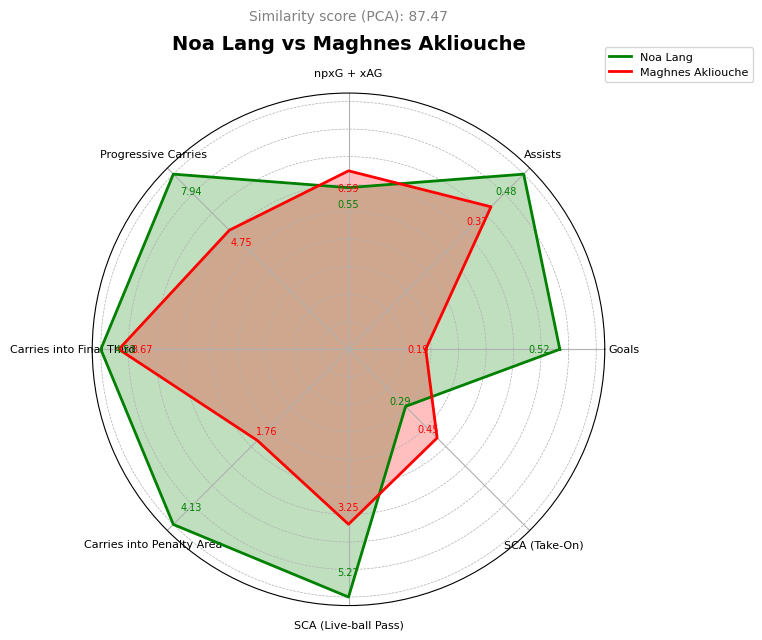

In [105]:
compare_two_players_radar_pca(
    player1_name="Noa Lang",
    player2_name="Maghnes Akliouche",
    df=final_df_am,
    features=features,
    df_pca=X_pca,
    cluster_labels=final_df_am["Cluster"]
)


### Final Naming + Export

In [106]:
final_df_am

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Own Goals,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster
449,Matteo Politano,1993-08-03,SerieA,Napoli,Left,Italy,Att Mid / Wingers,2804,0.10,0.13,...,0.0,3.05,0.19,0.64,23.1,1838,32.0,78.032681,78.032681,0
450,Khvicha Kvaratskhelia,2001-02-12,SerieA,Paris Saint-Germain,Right,Georgia,Att Mid / Wingers,1178,0.38,0.23,...,0.0,3.44,0.31,0.38,44.4,1975,24.0,80.539430,83.889082,4
451,David Neres,1997-03-03,SerieA,Napoli,Left,Brazil,Att Mid / Wingers,1283,0.14,0.28,...,0.0,3.65,0.21,0.70,23.1,1838,28.0,76.513364,76.513364,4
452,Giacomo Raspadori,2000-02-18,SerieA,Napoli,Right,Italy,Att Mid / Wingers,1103,0.49,0.08,...,0.0,3.51,0.41,0.90,31.3,1838,25.0,78.753267,79.401676,2
453,Michael Folorunsho,1998-02-07,SerieA,Fiorentina,Right,Italy,Att Mid / Wingers,685,0.00,0.00,...,0.0,4.07,2.37,1.71,58.1,1757,27.0,67.822715,67.822715,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Wes Burns,1994-11-23,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,926,0.00,0.10,...,0.0,4.86,0.78,2.04,27.6,1797,31.0,71.552210,71.552210,2
1022,Conor Chaplin,1997-02-16,PremierLeague,Ipswich Town,Right,England,Att Mid / Wingers,857,0.11,0.11,...,0.0,2.84,0.32,0.95,25.0,1797,28.0,72.447367,72.447367,2
1023,Nathan Broadhead,1998-04-05,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,702,0.26,0.00,...,0.0,4.10,0.13,1.28,9.1,1797,27.0,68.134265,68.134265,1
1024,Mateus Fernandes,2004-07-10,PremierLeague,Southampton,Right,Portugal,Att Mid / Wingers,2909,0.06,0.12,...,0.0,5.54,0.46,0.28,62.5,1782,21.0,76.610350,82.266718,0


In [107]:
cluster_labels = {k: v[0] for k, v in cluster_names.items()}

final_df_am["Cluster Name"] = final_df_am["Cluster"].map(cluster_labels)

In [108]:
final_df_am

,Player,Birthdate,League,Club,Footed,Nationality,Position,Minutes,Goals,Assists,...,Ball Recoveries,Aerials Won,Aerials Lost,% of Aerials Won,Elo,Age,Rating,Potential,Cluster,Cluster Name
449,Matteo Politano,1993-08-03,SerieA,Napoli,Left,Italy,Att Mid / Wingers,2804,0.10,0.13,...,3.05,0.19,0.64,23.1,1838,32.0,78.032681,78.032681,0,Hybrid Orchestrators
450,Khvicha Kvaratskhelia,2001-02-12,SerieA,Paris Saint-Germain,Right,Georgia,Att Mid / Wingers,1178,0.38,0.23,...,3.44,0.31,0.38,44.4,1975,24.0,80.539430,83.889082,4,World-Class Wingers
451,David Neres,1997-03-03,SerieA,Napoli,Left,Brazil,Att Mid / Wingers,1283,0.14,0.28,...,3.65,0.21,0.70,23.1,1838,28.0,76.513364,76.513364,4,World-Class Wingers
452,Giacomo Raspadori,2000-02-18,SerieA,Napoli,Right,Italy,Att Mid / Wingers,1103,0.49,0.08,...,3.51,0.41,0.90,31.3,1838,25.0,78.753267,79.401676,2,Secondary Attackers
453,Michael Folorunsho,1998-02-07,SerieA,Fiorentina,Right,Italy,Att Mid / Wingers,685,0.00,0.00,...,4.07,2.37,1.71,58.1,1757,27.0,67.822715,67.822715,2,Secondary Attackers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Wes Burns,1994-11-23,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,926,0.00,0.10,...,4.86,0.78,2.04,27.6,1797,31.0,71.552210,71.552210,2,Secondary Attackers
1022,Conor Chaplin,1997-02-16,PremierLeague,Ipswich Town,Right,England,Att Mid / Wingers,857,0.11,0.11,...,2.84,0.32,0.95,25.0,1797,28.0,72.447367,72.447367,2,Secondary Attackers
1023,Nathan Broadhead,1998-04-05,PremierLeague,Ipswich Town,Right,Wales,Att Mid / Wingers,702,0.26,0.00,...,4.10,0.13,1.28,9.1,1797,27.0,68.134265,68.134265,1,Direct Dribbling Threats
1024,Mateus Fernandes,2004-07-10,PremierLeague,Southampton,Right,Portugal,Att Mid / Wingers,2909,0.06,0.12,...,5.54,0.46,0.28,62.5,1782,21.0,76.610350,82.266718,0,Hybrid Orchestrators


In [109]:
final_df_am.to_csv("final_df_with_clusters.csv", index=False)